In [9]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2

import attractor_network
import analysis

In [34]:
# setup the neurons for experimentation
network = b2.Network()
params = attractor_network.default_params

neuron_group_i = b2.NeuronGroup(8, attractor_network.neuron_eqs_i, threshold='v>v_thresh_i', refractory='refrac_i', reset='v=v_reset_i', method='euler')
neuron_group_i.v = params['v_rest_i']

neuron_group_input = b2.PoissonGroup(1, 10*b2.Hz)
input_connection = b2.Synapses(neuron_group_input, neuron_group_i, 'w = weight_input : 1', on_pre='ge_post += w')
input_connection.connect(True)

monitor_i = b2.SpikeMonitor(neuron_group_i)
# monitor_i = b2.StateMonitor(neuron_group_i, True, True)
monitor_input = b2.SpikeMonitor(neuron_group_input)

network.add([neuron_group_i, neuron_group_input, input_connection, monitor_i, monitor_input])
network.store()

In [46]:
duration = 1000*b2.ms

network.restore()
params.update({'weight_input': 2})
network.run(duration, namespace=params)

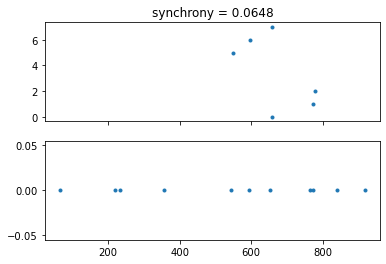

In [47]:
fig, axs = plt.subplots(2,1,sharex=True)
assert(isinstance(axs, np.ndarray))
axs[0].plot(monitor_i.t/b2.ms, monitor_i.i[:], '.')
axs[0].set_title(f'synchrony = {analysis.spike_train_synchrony_correlation(monitor_i.t/b2.ms, monitor_i.i[:], duration/b2.ms):.4f}')
axs[1].plot(monitor_input.t/b2.ms, monitor_input.i[:], '.')
plt.show()

In [60]:
def run_with_weight(w, rate=10*b2.Hz):
	network.restore()
	params.update({'weight_input': w})
	neuron_group_input.rates = rate
	network.run(duration, namespace=params)
	return analysis.spike_train_synchrony_correlation(monitor_i.t/b2.ms, monitor_i.i[:], duration/b2.ms)

def run_n_times(N:int, function):
	results = np.array([function() for _ in range(N)])
	return np.nanmean(results), np.nanstd(results)

weights = np.arange(0.5, 10, 0.5)
syn10 = [run_n_times(5, lambda: run_with_weight(w, 10*b2.Hz)) for w in weights]
syn100 = [run_n_times(5, lambda: run_with_weight(w, 100*b2.Hz)) for w in weights]

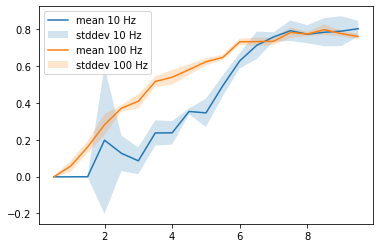

In [61]:
for syn,rate in zip([syn10,syn100],[10,100]):
	plt.plot(weights, [s[0] for s in syn], label=f'mean {rate} Hz')
	plt.fill_between(weights, [s[0]-s[1] for s in syn], [s[0]+s[1] for s in syn], alpha=0.2, label=f'stddev {rate} Hz')
plt.legend()
plt.show()

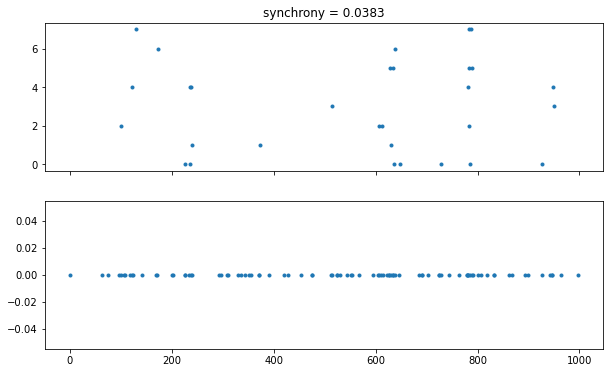

In [66]:
duration = 1000*b2.ms

network.restore()
params.update({'weight_input': 1})
neuron_group_input.rates = 100*b2.Hz
network.run(duration, namespace=params)

fig, axs = plt.subplots(2,1,sharex=True,figsize=(10,6))
assert(isinstance(axs, np.ndarray))
axs[0].plot(monitor_i.t/b2.ms, monitor_i.i[:], '.')
axs[0].set_title(f'synchrony = {analysis.spike_train_synchrony_correlation(monitor_i.t/b2.ms, monitor_i.i[:], duration/b2.ms):.4f}')
axs[1].plot(monitor_input.t/b2.ms, monitor_input.i[:], '.')
plt.show()

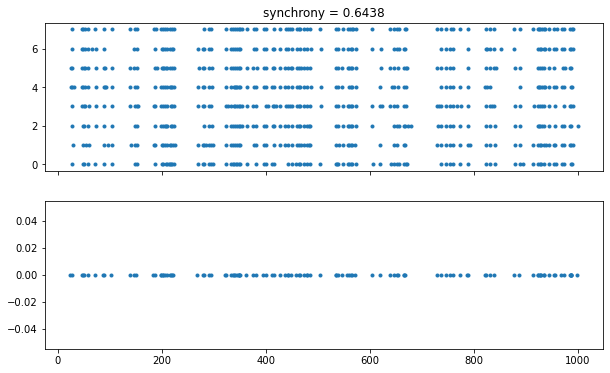

In [67]:
network.restore()
params.update({'weight_input': 5})
neuron_group_input.rates = 100*b2.Hz
network.run(duration, namespace=params)

fig, axs = plt.subplots(2,1,sharex=True,figsize=(10,6))
assert(isinstance(axs, np.ndarray))
axs[0].plot(monitor_i.t/b2.ms, monitor_i.i[:], '.')
axs[0].set_title(f'synchrony = {analysis.spike_train_synchrony_correlation(monitor_i.t/b2.ms, monitor_i.i[:], duration/b2.ms):.4f}')
axs[1].plot(monitor_input.t/b2.ms, monitor_input.i[:], '.')
plt.show()